# **Case QuantumFinance - Disciplina NLP - Classificador de chamados**

***Participantes (RM - NOME):***<br>
xxxx - xxxxx<br>
xxxx - xxxxx<br>
xxxx - xxxxx<br>
xxxx - xxxxx<br>

###**Crie um classificador de chamados aplicando técnicas de PLN**
---

A **QuantumFinance** tem um canal de atendimento via chat e precisar classificar os assuntos dos atendimentos para melhorar as tratativas dos chamados dos clientes. O canal recebe textos abertos dos clientes relatando o problema e/ou dúvida e depois é direcionado para alguma área especialista no assunto para uma melhor tratativa.​

1. Crie um modelo classificador de assuntos aplicando técnicas de PLN, que consiga classificar através de um texto o assunto conforme disponível na base de dados [1] para treinamento e validação do seu modelo.​

  O modelo precisar atingir um score na **métrica F1 Score superior a 75%**. Utilize o dataset [1] para treinar e testar o modelo, separe o dataset em duas amostras (75% para treinamento e 25% para teste com o randon_state igual a 42).​

2. Utilizar ao menos uma aplicação de modelos de GenAI (LLM´s) para criar o modelo classificador com os mesmos critérios do item 1.

Fique à vontade para testar e explorar as técnicas de pré-processamento, abordagens de NLP, algoritmos e bibliotecas, mas explique e justifique as suas decisões durante o desenvolvimento.​

**Composição da nota:​**

**50%** - Demonstrações das aplicações das técnicas de PLN (regras, pré-processamentos, tratamentos, variedade de modelos aplicados, aplicações de GenIA, organização do pipeline, etc.)​

**50%** - Baseado na performance (score) obtida com a amostra de teste no pipeline do modelo campeão (validar com  a Métrica F1 Score). **Separar o pipeline completo do modelo campeão conforme template.​**

O trabalho poderá ser feito em grupo de 2 até 4 pessoas (mesmo grupo do Startup One) e trabalhos iguais serão descontado nota e passível de reprovação.

**[1] = ​https://dados-ml-pln.s3.sa-east-1.amazonaws.com/tickets_reclamacoes_classificados.csv**

**[F1 Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)** com average='weighted'

In [ ]:
# CARREGANDO O DATA FRAME
#import pandas as pd
#df = pd.read_csv('https://dados-ml-pln.s3.sa-east-1.amazonaws.com/tickets_reclamacoes_classificados.csv', delimiter=';')

# Façam o download do arquivo e utilizem localmente durante os testes

Bom desenvolvimento!

###**Area de desenvolvimento e validações**

Faça aqui as demonstrações das aplicações das técnicas de PLN (regras, pré-processamentos, tratamentos, variedade de modelos aplicados, organização do pipeline, etc.)​

Fique à vontade para testar e explorar as técnicas de pré-processamento, abordagens de NLP, algoritmos e bibliotecas, mas explique e justifique as suas decisões durante o desenvolvimento.​

#### Importação e instalação de bibliotecas

In [6]:
!pip install gensim --quiet
!pip install sentence-transformers --quiet
!pip install xgboost --quiet
!python -m spacy download pt_core_news_sm --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 81.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload 

In [1]:
# Data Science
import numpy as np
import pandas as pd
import re
import string
import unicodedata

# NLP
import nltk
import spacy
from gensim.models import KeyedVectors
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer

# Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay)
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Parallel Processing
from joblib import Parallel, delayed

# NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

ImportError: cannot import name 'triu' from 'scipy.linalg' (/usr/local/lib/python3.11/dist-packages/scipy/linalg/__init__.py)

In [ ]:
!wget 'https://dados-ml-pln.s3-sa-east-1.amazonaws.com/skip_s300.zip'
!unzip 'skip_s300.zip'
!ls -la

--2025-03-19 14:29:30--  https://dados-ml-pln.s3-sa-east-1.amazonaws.com/skip_s300.zip
Resolving dados-ml-pln.s3-sa-east-1.amazonaws.com (dados-ml-pln.s3-sa-east-1.amazonaws.com)... 3.5.234.43, 3.5.233.185, 3.5.232.201, ...
Connecting to dados-ml-pln.s3-sa-east-1.amazonaws.com (dados-ml-pln.s3-sa-east-1.amazonaws.com)|3.5.234.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 958619745 (914M) [application/zip]
Saving to: ‘skip_s300.zip’

skip_s300.zip       100%[===================>] 914.21M  24.5MB/s    in 37s     

2025-03-19 14:30:08 (24.8 MB/s) - ‘skip_s300.zip’ saved [958619745/958619745]

Archive:  skip_s300.zip
  inflating: skip_s300.txt           
total 3561828
drwxr-xr-x 1 root root       4096 Mar 19 14:30 .
drwxr-xr-x 1 root root       4096 Mar 19 14:16 ..
drwxr-xr-x 4 root root       4096 Mar 17 13:29 .config
drwxr-xr-x 1 root root       4096 Mar 17 13:29 sample_data
-rw-r--r-- 1 root root 2655642222 Oct  4  2018 skip_s300.txt
-rw-r--r-- 1 root root

#### Importação da base

In [ ]:
df = pd.read_csv('/content/tickets_reclamacoes_classificados.csv', delimiter=';')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21072 entries, 0 to 21071
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_reclamacao         21072 non-null  int64 
 1   data_abertura         21072 non-null  object
 2   categoria             21072 non-null  object
 3   descricao_reclamacao  21072 non-null  object
dtypes: int64(1), object(3)
memory usage: 658.6+ KB


#### EDA

In [ ]:
freq_cat = df['categoria'].value_counts()

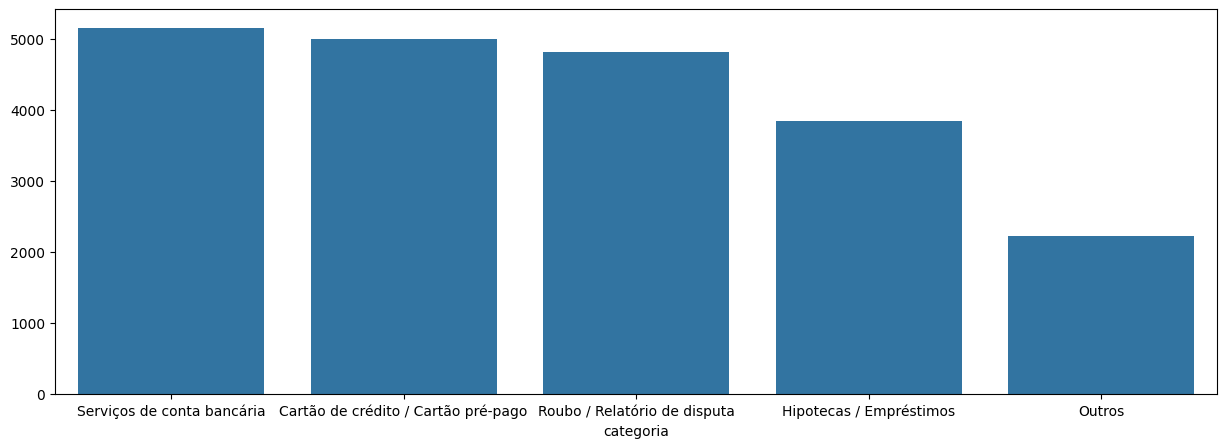

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x=freq_cat.index, y=freq_cat.values, ax=ax)
plt.show()

In [ ]:
df[df['categoria'] == 'Serviços de conta bancária']['descricao_reclamacao'].iloc[0]

'Meu neto me dê cheque por {$ 1600,00} Eu depositei -o na minha conta Chase depois que o fundo limpo meu banco de perseguição fechou minha conta nunca me pagou meu dinheiro, eles disseram que precisavam para espreitar com o cheque do meu neto estava claro que o dinheiro estava fazendo pela minha perseguição Banco se recusa a me pagar meu dinheiro, meu neto chamou Chase 2 vezes, eles disseram que eu deveria ligar para ele para verificar o proprietário do cheque, ele está fora do país a maior parte da data de horário acontecer xx/xx/2018 Número de cheque xxxx Número de reclamação é xxxx com correr atrás'

In [ ]:
df[df['categoria'] == 'Cartão de crédito / Cartão pré-pago']['descricao_reclamacao'].iloc[0]

'Atualizei meu cartão xxxx xxxx em xx/xx/2018 e fui informado pelo agente que fez a atualização que minha data de aniversário não mudaria. Ele virou o agente me dando as informações erradas para atualizar a conta. Xxxx alterou minha data de aniversário de xx/xx/xxxx para xx/xx/xxxx sem meu consentimento! XXXX tem a gravação do agente que me enganou.'

In [ ]:
df[df['categoria'] == 'Roubo / Relatório de disputa']['descricao_reclamacao'].iloc[0]

'Em xxxx xx/xx/2019, fiz um pagamento {$ 300.00} a um varejista on -line usando o Chase Quick Pay com xxxx no site da Chase. Percebi que este era um site de fraudes após nenhuma confirmação, produto ou resposta a quaisquer perguntas sobre o pedido e contatou o Chase para obter mais informações sobre a transação para tentar obter um reembolso pelo banco de varejistas.\r\n\r\nEntrei em contato com o Chase por meio de uma mensagem segura em xx/xx/2019 explicando o que aconteceu e perguntei: "Existe uma maneira de reverter essa transação, ou você tem um contato no XXXX que pode me fornecer mais informações sobre o destinatário? \'\' Que xxxx , minha mensagem foi revisada e recebi uma resposta reafirmando meu e -mail original e me informando que "a transferência foi concluída. No entanto, como você mencionou que o site é uma farsa enquanto podemos lidar com a maioria das perguntas por e -mail, algumas exigem a experiência de outra equipe. Para ajudá -lo melhor em relação ao reembolso, solic

In [ ]:
df[df['categoria'] == 'Hipotecas / Empréstimos']['descricao_reclamacao'].iloc[0]

'Bom dia, meu nome é xxxx xxxx e agradeço se você puder me ajudar a acabar com os serviços de membro do cartão bancário.\r\nEm 2018, escrevi para Chase solicitar verificação da dívida e o que eles me enviaram uma declaração que não é aceitável. Estou pedindo ao banco que valide a dívida. Em vez disso, recebi e -mails todos os meses, tentando coletar uma dívida.\r\nTenho o direito de conhecer essas informações como consumidor.\r\n\r\nConta do Chase # xxxx xxxx xxxx xxxx Obrigado antecipadamente pela sua ajuda.'

In [ ]:
df[df['categoria'] == 'Outros']['descricao_reclamacao'].iloc[0]

'Durante os meses de verão, experimento uma renda de declínio devido ao meu emprego. Portanto, solicito uma extensão de pagamento de um mês com minha empresa de empréstimos para automóveis, Chase. Nos últimos quase quatro anos, meu pedido de extensão de pagamento é concedido. Nunca fui delinqüente com meu pagamento de empréstimo automático. No entanto, em XX/XX/2019, meu pedido de uma extensão de pagamento de um mês foi negada este ano. Expliquei minha situação ao representante e ao supervisor sem sucesso. Após uma longa discussão e espera, fui informado o motivo do declínio, pois não é "contratual". Esse motivo de negação me confundi e, portanto, enviei um e -mail ao Escritório da XXXX XXXX Diretor Executivo, Comunicação, JPMorgan Chase & Co. O representante entrou em contato comigo e afirmou que Chase seguirá. Cerca de semana depois, um representante do escritório xxxx xxxx xxxx chamado. O representante compartilhou seu papel foi ajudar a resolver o assunto. O representante via telec

Ao analisar nossos dados, destacam-se os seguintes aspectos:

**Balanceamento das Classes:**
As classes apresentam um leve desbalanceamento, mas não de forma significativa.

**Dados Sigilos:**
As descrições das reclamações contêm caracteres como 'x', utilizados para preservar a confidencialidade de informações sensíveis. Isso pode exigir um tratamento de pré-processamento específico.

**Formatação das Descrições:**
Algumas descrições incluem caracteres especiais, como \r e \n, que podem ser resquícios de formatação de texto. A remoção ou tratamento desses caracteres será necessária para evitar ruídos no processamento.

**Classe 'Outros':**
Essa classe provavelmente agrupa reclamações variadas, o que pode dificultar sua classificação precisa.

#### Pré-processamento

In [ ]:
# Instância stopwords e biblioteca spacy
stopwords_list = nltk.corpus.stopwords.words('portuguese')
stopwords_list.extend(['\r', '\n'])
nlp = spacy.load("pt_core_news_sm")

# Remove pontuação
def remove_punctuation(text):
    punctuations = string.punctuation
    table = str.maketrans({key: " " for key in punctuations})
    return text.translate(table)

def remove_accents(text):
    return unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('ASCII')

# 1 - Coloca texto em minúsculas
# 2 - Remove pontuação
# 3 - Remove padrões de dados sigilosos (xx)
# 4 - Remove dígitos
# 5 - Tokeniza - Unigram
# 6 - Remove stopwords incluindo \r e \n
def norm_tokenize(text):
    text = text.lower()
    text = remove_punctuation(text)
    text = remove_accents(text)
    text = re.sub(r'\b[Xx]{2,}\b', '', text)
    text = "".join([w for w in text if not w.isdigit()])
    tokens = word_tokenize(text)
    tokens = [x for x in tokens if x not in stopwords_list]

    return tokens

# Lemmatiza token de acordo com parâmetro escolhido
def lemmatize_tokens(tokens, lemma='VERB'):
    doc = nlp(" ".join(tokens))
    lemmatized_tokens = []
    for token in doc:
        if token.pos_ == lemma:
            lemmatized_tokens.append(token.lemma_)
        else:
            lemmatized_tokens.append(token.text)
    return lemmatized_tokens

# Realiza processamento paralelo para performance
def process_dataframe(df, column):
    return Parallel(n_jobs=-1)(delayed(norm_tokenize)(text) for text in df[column])

In [ ]:
df_model = df[['categoria', 'descricao_reclamacao']].copy()

df_model['tokens'] = process_dataframe(df_model, 'descricao_reclamacao')

df_model['tokens_lemmatized'] = df_model['tokens'].apply(lemmatize_tokens, lemma='VERB')

df_model.head()

,categoria,descricao_reclamacao,tokens,tokens_lemmatized
0,Hipotecas / Empréstimos,"Bom dia, meu nome é xxxx xxxx e agradeço se vo...","[bom, dia, nome, agradeco, voce, puder, ajudar...","[bom, dia, nome, agradeco, voce, puder, ajudar..."
1,Cartão de crédito / Cartão pré-pago,Atualizei meu cartão xxxx xxxx em xx/xx/2018 e...,"[atualizei, cartao, informado, agente, fez, at...","[atualizei, cartao, informar, agente, fazer, a..."
2,Cartão de crédito / Cartão pré-pago,O cartão Chase foi relatado em xx/xx/2019. No ...,"[cartao, chase, relatado, entanto, pedido, fra...","[cartao, chase, relatar, entanto, pedido, frau..."
3,Cartão de crédito / Cartão pré-pago,"Em xx/xx/2018, enquanto tentava reservar um ti...","[enquanto, tentava, reservar, ticket, deparei,...","[enquanto, tentar, reservar, ticket, deparar, ..."
4,Serviços de conta bancária,"Meu neto me dê cheque por {$ 1600,00} Eu depos...","[neto, cheque, depositei, conta, chase, fundo,...","[neto, cheque, depositei, contar, chase, fundo..."


#### Embedding

In [ ]:
seed = 42
test_size = 0.25

##### Skip-gram

In [ ]:
model_skip = KeyedVectors.load_word2vec_format('skip_s300.txt')

In [ ]:
def average_vector(words):
  vectors = [model_skip[word] for word in words if word in model_skip]
  if vectors:
    return sum(vectors) / len(vectors)
  else:
    vector_size = model_skip.vector_size
    vector = np.zeros(vector_size)
    return vector

In [ ]:
X = df_model['tokens']
y = df_model['categoria']

X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(X, y, test_size=test_size, random_state=seed)

X_train_sk = X_train_sk.apply(average_vector)
X_test_sk = X_test_sk.apply(average_vector)

In [ ]:
X = df_model['tokens_lemmatized']
y = df_model['categoria']

X_train_sk_lem, X_test_sk_lem, y_train_sk_lem, y_test_sk_lem = train_test_split(X, y, test_size=test_size, random_state=seed)

X_train_sk_lem = X_train_sk.apply(average_vector)
X_test_sk_lem = X_test_sk.apply(average_vector)

##### Transformer

In [ ]:
transformer = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.46k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

In [ ]:
X = df_model['tokens']
y = df_model['categoria']

X = [" ".join(tokens) for tokens in X]
X = transformer.encode(X)

X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
X = df_model['tokens_lemmatized']
y = df_model['categoria']

X = [" ".join(tokens) for tokens in X]
X = transformer.encode(X)

X_train_tr_lem, X_test_tr_lem, y_train_tr_lem, y_test_tr_lem = train_test_split(X, y, test_size=test_size, random_state=seed)

#### Pipeline de treino e teste

In [ ]:
pipelines = [
    ('LGT_Skip', X_train_sk, y_train_sk, X_test_sk, y_test_sk, LogisticRegression(random_state=seed)),
    ('LGT_Skip_Lemma', X_train_sk_lem, y_train_sk_lem, X_test_sk_lem, y_test_sk_lem, LogisticRegression(random_state=seed)),
    ('LGT_Transformers', X_train_tr, y_train_tr, X_test_tr, y_test_tr, LogisticRegression(random_state=seed)),
    ('LGT_Transformers_Lemma', X_train_tr_lem, y_train_tr_lem, X_test_tr_lem, y_test_tr_lem, LogisticRegression(random_state=seed)),
    ('RDF_Skip', X_train_sk, y_train_sk, X_test_sk, y_test_sk, RandomForestClassifier(random_state=seed)),
    ('RDF_Skip_Lemma', X_train_sk_lem, y_train_sk_lem, X_test_sk_lem, y_test_sk_lem, RandomForestClassifier(random_state=seed)),
    ('RDF_Transformers', X_train_tr, y_train_tr, X_test_tr, y_test_tr, RandomForestClassifier(random_state=seed)),
    ('RDF_Transformers_Lemma', X_train_tr_lem, y_train_tr_lem, X_test_tr_lem, y_test_tr_lem, RandomForestClassifier(random_state=seed)),
    ('XG_Skip', X_train_sk, y_train_sk, X_test_sk, y_test_sk, xgb.XGBClassifier(random_state=seed)),
    ('XG_Skip_Lemma', X_train_sk_lem, y_train_sk_lem, X_test_sk_lem, y_test_sk_lem, xgb.XGBClassifier(random_state=seed)),
    ('XG_Transformers', X_train_tr, y_train_tr, X_test_tr, y_test_tr, xgb.XGBClassifier(random_state=seed)),
    ('XG_Transformers_Lemma', X_train_tr_lem, y_train_tr_lem, X_test_tr_lem, y_test_tr_lem, xgb.XGBClassifier(random_state=seed))
]

for name, X_train, y_train, X_test, y_test, model in pipelines:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Classification Report de {name}:\n{classification_report(y_test, y_pred)}\n')
    print(f'Accuracy Score de {name}: {accuracy_score(y_test, y_pred)}\n')
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix de {name}')
    plt.show()

###**Validação do professor**

Consolidar apenas os scripts do seu **modelo campeão**, desde o carregamento do dataframe, separação das amostras, tratamentos utilizados (funções, limpezas, etc.), criação dos objetos de vetorização dos textos e modelo treinado e outras implementações utilizadas no processo de desenvolvimento do modelo.

O modelo precisar atingir um score na métrica F1 Score superior a 75%.

**Atenção:** **Implemente aqui apenas os scripts que fazem parte do modelo campeão.**
